<h1 align="center">Dos partículas indistinguibles confinadas en un pozo de potencial</h1>
<div align="right">David A. Miranda, PhD<br>2020</div>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.special import gamma

# 1. Funciones de onda de una partícula

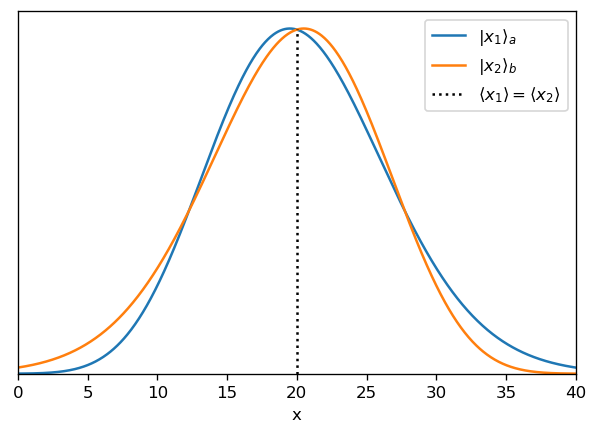

In [2]:
L = 20
x = np.linspace(0, 40, 1000)
X0 = 2*L

def poisson(x, L=L):
    return L**x * np.exp(-L) / gamma(x+1)

def bracket(f,O,i, x=x):
    return np.trapz(f*O*i, x)

psi_a = np.sqrt(poisson(x))
psi_b = np.sqrt(poisson(X0-x))

plt.figure(dpi=120)
plt.plot(x, psi_a/max(psi_a), label=r'$|x_1\rangle_a$')
plt.plot(x, psi_b/max(psi_b), label=r'$|x_2\rangle_b$')
plt.plot(2*[L], [0, 1], 'k:', label=r'$\langle x_1 \rangle = \langle x_2 \rangle$')
plt.xlabel('x')
plt.yticks([])
plt.axis([min(x), max(x), 0 , 1.05])
_ = plt.legend()

# 2. Funciones de onda simetrica (bosones) y antisimétrica (fermiones) respecto al intercambio de partículas

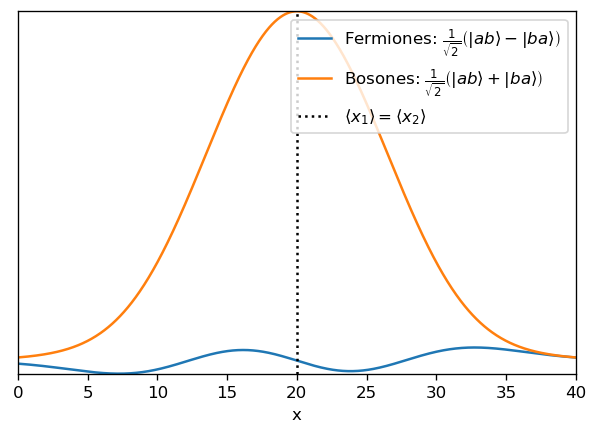

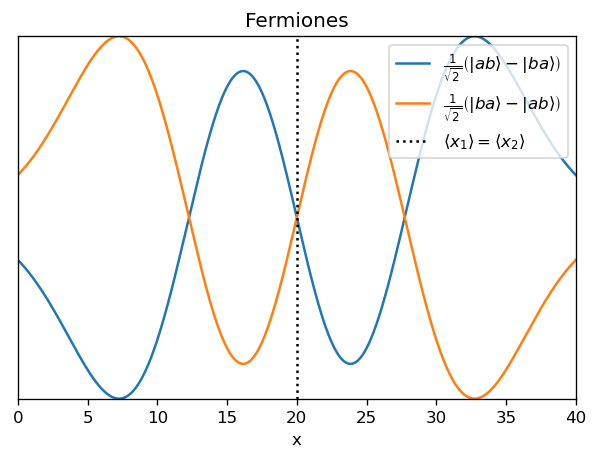

In [3]:
psi_boson = (1/np.sqrt(2))*(psi_a + psi_b)
psi_fermion = (1/np.sqrt(2))*(psi_a - psi_b)

boson_label = r'Bosones: $\frac{1}{\sqrt{2}}\left(|ab\rangle + |ba\rangle\right)$'
fermion_label = r'Fermiones: $\frac{1}{\sqrt{2}}\left(|ab\rangle - |ba\rangle\right)$'
plt.figure(dpi=120)
plt.plot(x, psi_fermion, label=fermion_label)
plt.plot(x, psi_boson, label=boson_label)
plt.plot(2*[L], [min(psi_fermion), 1], 'k:', label=r'$\langle x_1 \rangle = \langle x_2 \rangle$')
plt.xlabel('x')
plt.yticks([])
plt.axis([min(x), max(x), min(psi_fermion), max(psi_boson)])
_ = plt.legend(loc=1)

plt.figure(dpi=120)
plt.plot(x, psi_fermion, label=r'$\frac{1}{\sqrt{2}}\left(|ab\rangle - |ba\rangle\right)$')
plt.plot(x, -psi_fermion, label=r'$\frac{1}{\sqrt{2}}\left(|ba\rangle - |ab\rangle\right)$')
plt.plot(2*[L], [min(psi_fermion), 1], 'k:', label=r'$\langle x_1 \rangle = \langle x_2 \rangle$')
plt.xlabel('x')
plt.yticks([])
plt.axis([min(x), max(x), min(psi_fermion), max(psi_fermion)])
plt.title('Fermiones')
_ = plt.legend(loc=1)

# 3. Distancia entre las dos partículas
$$ \langle (x_1 - x_2)^2 \rangle_\pm = \langle x^2 \rangle_a + \langle x^2 \rangle_b - 2 \langle x \rangle_a\langle x \rangle_b \mp 2 \langle a | x | b \rangle_a$$ 

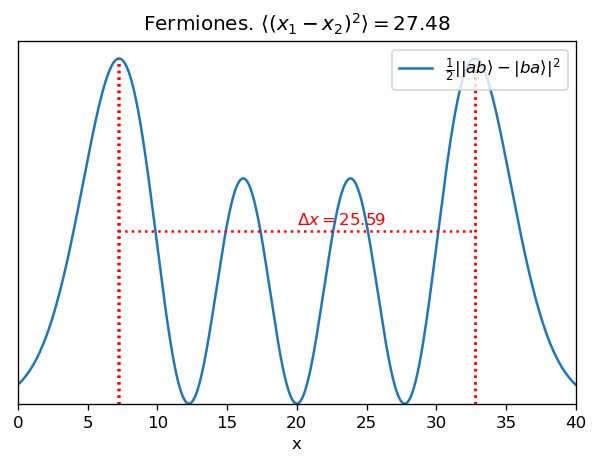

In [5]:
x1x1 = bracket(psi_a, x**2, psi_a)
x2x2 = bracket(psi_a, x**2, psi_b)
x1 = bracket(psi_a, x, psi_a)
axb  = bracket(psi_b, x, psi_a)
Delta_x = np.sqrt(np.abs(x1x1 + x2x2 - 2*x1*x1 - 2*axb**2))

psi_psi = psi_fermion**2
peak = np.zeros(len(x))
peak[psi_psi > 0.95*psi_psi.max()] = 1
D1 = x[np.gradient(peak) < 0]
D2 = x[np.gradient(peak) > 0]
Dx = (D2 + D1)/2

A = max(psi_fermion**2)

plt.figure(dpi=120)
plt.plot(x, psi_psi, label=r'$\frac{1}{2}\left||ab\rangle - |ba\rangle\right|^2$')
for d in Dx:
    plt.plot(2*[d], [0,A], ':r')
plt.plot([Dx[0], Dx[-1]], 2*[0.5*A], ':r')
plt.text(np.mean([Dx[0], Dx[-1]]), 0.52*A, r'$\Delta x = %0.2f$' % (Dx[-1] - Dx[0]), color='r')

plt.xlabel('x')
plt.yticks([])
plt.axis([min(x), max(x), min(psi_fermion**2), 1.05*A])
plt.title(r'Fermiones. $\langle (x_1 - x_2)^2 \rangle = %0.2f$' % Delta_x)
_ = plt.legend(loc=1)

End!